In [1]:
import cv2
import copy
from matplotlib import pyplot as plt


In [2]:
# ORB角点检测
frame1 = cv2.imread("./frame5.jpg")
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
gray1 = cv2.cvtColor(frame1, cv2.COLOR_RGB2GRAY)

frame2 = cv2.imread("./frame6.jpg")
frame2 = cv2.cvtColor(frame2, cv2.COLOR_BGR2RGB)
gray2 = cv2.cvtColor(frame2, cv2.COLOR_RGB2GRAY)


In [3]:
orb = cv2.ORB_create()
kp1, des1 = orb.detectAndCompute(gray1, None)
kp2, des2 = orb.detectAndCompute(gray2, None)

# crossCheck=True，两张图的点A→B和B→A各算一次。
bf = cv2.BFMatcher(cv2.NORM_HAMMING)


matches = bf.knnMatch(des1, des2, k=2)

good_matches = [[x1] for x1, x2 in matches if x1.distance < 0.75*x2.distance]


result =  cv2.drawMatchesKnn(frame1, kp1, frame2, kp2, good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS,matchColor=(0,255,0))

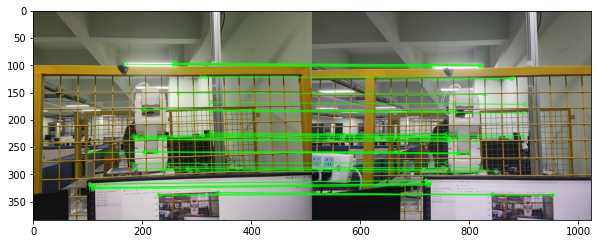

In [4]:
%matplotlib inline
fig = plt.figure(figsize=(10, 5))
axes = fig.subplots(1, sharey=True)
axes.imshow(result,cmap="gray")
plt.show()

In [5]:
print(dir(good_matches[0][0]))

['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


In [6]:
good_matches[0][0].trainIdx

62

In [7]:
matched_pixel_coor_pairs = list()
for match in good_matches:
    # trainIdx 上一帧关键点的索引
    # queryIdx 当前帧关键点的索引
    pre_pixel_coor = (int(kp1[match[0].queryIdx].pt[0]),
                      int(kp1[match[0].queryIdx].pt[1]))
    cur_pixel_coor = (int(kp2[match[0].trainIdx].pt[0]),
                      int(kp2[match[0].trainIdx].pt[1]))
    matched_pixel_coor_pairs.append((pre_pixel_coor, cur_pixel_coor))
    # print(matched_pixel_location_pairs)
    # break
len(matched_pixel_coor_pairs)

42

In [8]:

# %matplotlib widget
frame3 = copy.deepcopy(frame2)
for pixel_coor_pair in matched_pixel_coor_pairs:
    cv2.circle(frame3, pixel_coor_pair[1], color=(0,0,255), radius=3)
    cv2.line(frame3, pixel_coor_pair[0], pixel_coor_pair[1], color=(255,0,0))


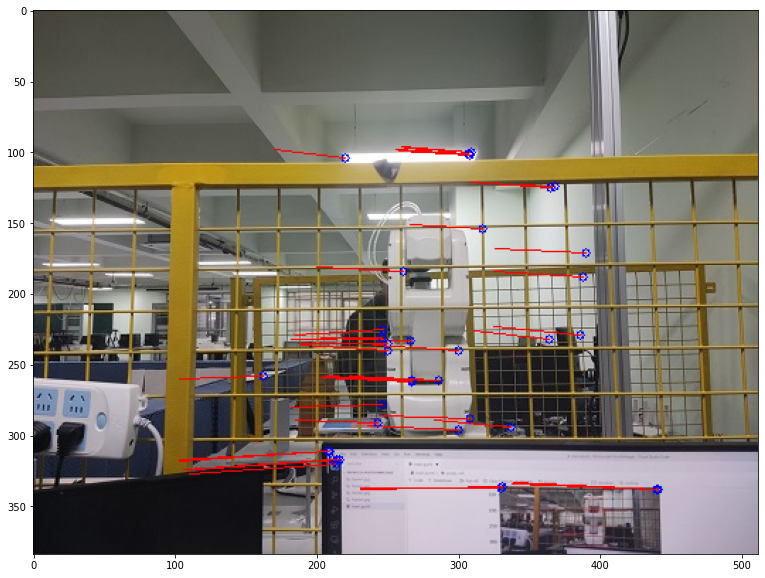

In [9]:
%matplotlib inline
fig = plt.figure(figsize=(15, 10))
axes = fig.subplots(1, sharey=True)
axes.imshow(frame3,cmap="gray")
plt.show()

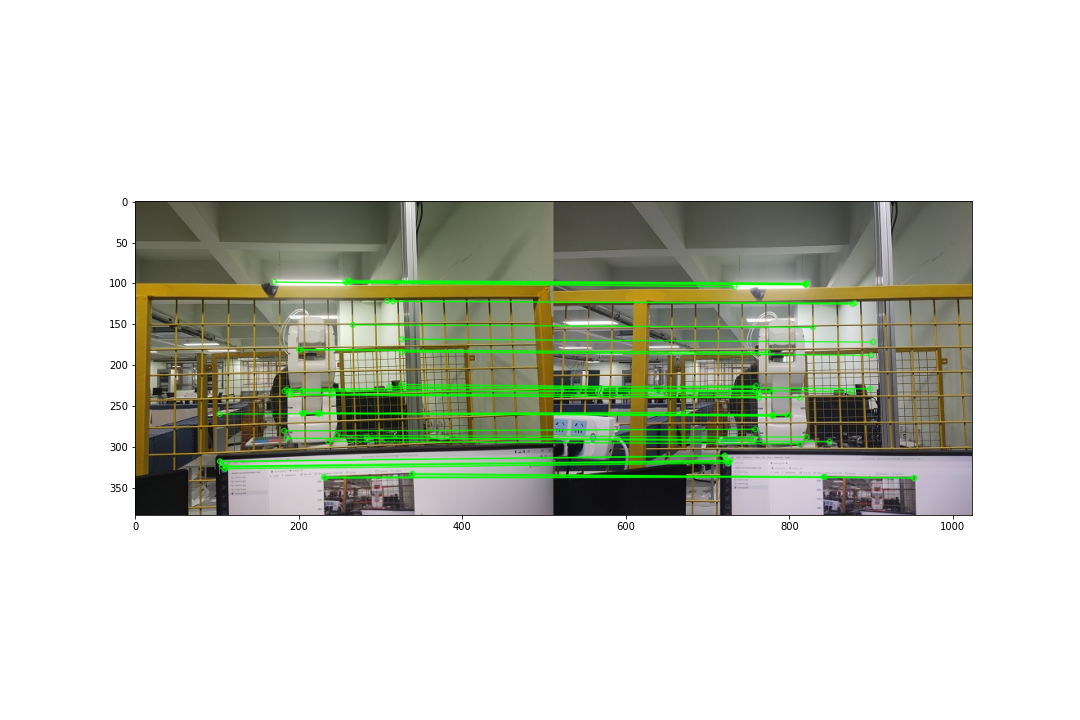

In [10]:
%matplotlib widget
fig = plt.figure(figsize=(15, 10))
axes = fig.subplots(1, sharey=True)
axes.imshow(result,cmap="gray")
plt.show()

# 对极约束求解相机运动
![](./images/%E5%AF%B9%E6%9E%81%E7%BA%A6%E6%9D%9F.png)
![](./images/eMatrix0.png)

对极约束需求两张图片来进行，上式中，$x_r,y_r$是指右图像素坐标中$p_r$的具体坐标，$\widetilde{p}_l$指的是左图像素坐标中$p_l$的像素坐标，最后进行线性方程组求解来解出本质矩阵$E= \begin{array}{c}
e_1^T \\
e_2^T \\
e_3^T
\end{array}
$